## LSTM - Long Short-Term Memory

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [2]:
#Load IMDB dataset
max_features = 10000
max_len = 200
(x_train,y_train),(x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = max_features)
#Pad sequences to ensure equal length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen = max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen = max_len)


In [3]:
# 2.build LSTM model
model = models.Sequential([
    layers.Embedding(input_dim=max_features,output_dim=128,input_length=max_len),
    layers.LSTM(64,return_sequences=False),
    layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/Users/deepak/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-11-06 09:08:30.023559: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-06 09:08:30.023637: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-06 09:08:30.023655: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-06 09:08:30.023839: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-06 09:08:30.023856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 3.Train model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)

test_loss , test_acc = model.evaluate(x_test,y_test,verbose = 0)
print(f'Test Accuracy: {test_acc:4f}')

Epoch 1/5


2025-11-06 09:08:30.871745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.8142 - loss: 0.4033 - val_accuracy: 0.8702 - val_loss: 0.3129
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9070 - loss: 0.2394 - val_accuracy: 0.8655 - val_loss: 0.3171
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9318 - loss: 0.1815 - val_accuracy: 0.8588 - val_loss: 0.3338
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.9474 - loss: 0.1451 - val_accuracy: 0.8395 - val_loss: 0.3821
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9640 - loss: 0.1009 - val_accuracy: 0.8509 - val_loss: 0.4068
Test Accuracy: 0.850880


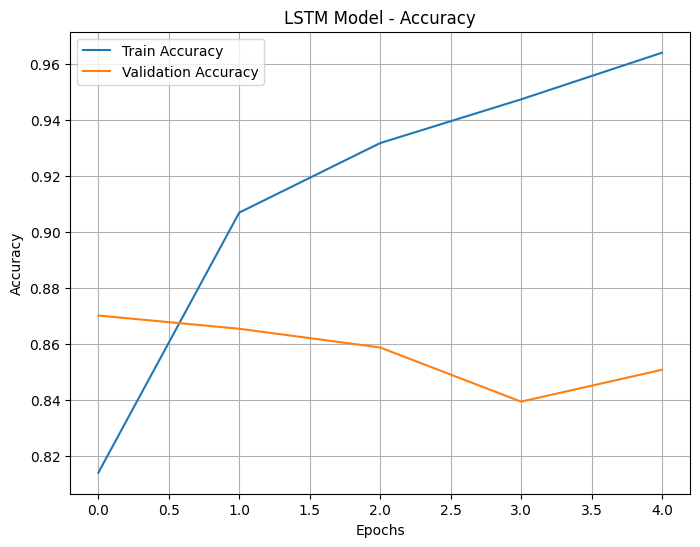

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

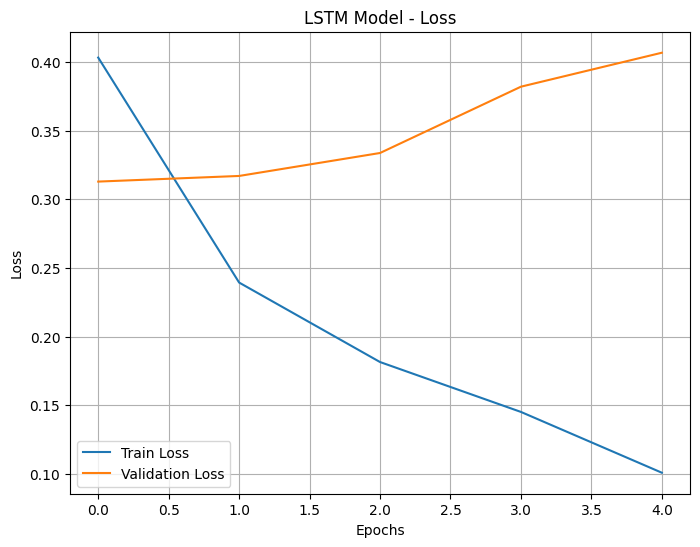

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 8. Sample predictions
# Get predictions for the test set
predictions = model.predict(x_test)

# Convert predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


In [8]:
# Display some sample predictions
print("Sample Predictions:")
for i in range(10): # Displaying first 10 samples
    print(f"Review {i+1}: True Label = {y_test[i]}, Predicted Label = {predicted_labels[i]}")

Sample Predictions:
Review 1: True Label = 0, Predicted Label = 0
Review 2: True Label = 1, Predicted Label = 1
Review 3: True Label = 1, Predicted Label = 1
Review 4: True Label = 0, Predicted Label = 1
Review 5: True Label = 1, Predicted Label = 1
Review 6: True Label = 1, Predicted Label = 1
Review 7: True Label = 1, Predicted Label = 1
Review 8: True Label = 0, Predicted Label = 0
Review 9: True Label = 0, Predicted Label = 1
Review 10: True Label = 1, Predicted Label = 1


In [9]:
# To display the actual text, you would need the word index,
# which was not loaded. We can add that if needed.

# 9. Generate predictions for the entire test set
# Predictions were already generated in the previous cell and stored in predicted_labels

# Flatten true labels
y_true = y_test # y_test is already a numpy array of true labels

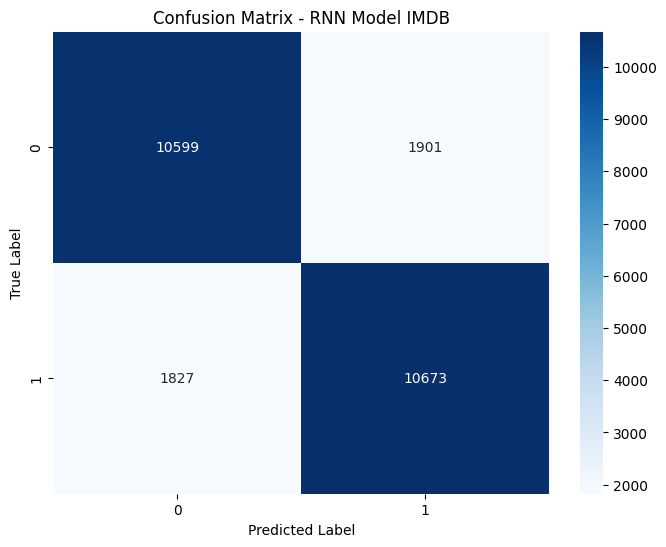

In [10]:
# 10. Confusion Matrix
cm = confusion_matrix(y_true, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Removed xticklabels and yticklabels as class_names is not available
plt.title("Confusion Matrix - RNN Model IMDB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [11]:
# 11. Classification Report
print("\nClassification Report - RNN Model IMDB")
print(classification_report(y_true, predicted_labels, zero_division=0))


Classification Report - RNN Model IMDB
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12500
           1       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

